# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the "correct" name

In [3]:
df = pd.read_csv("animals.csv")
df
#why isn't is printing the dimensions at the bottom??

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [4]:
df.shape

(6, 3)

In [5]:
df.dtypes

animal    object
name      object
length     int64
dtype: object

In [6]:
df.head()
#always good to look at this to get an idea

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32


In [7]:
df.tail()

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50
4,cat,Charlie,32
5,dog,Fontaine,35


## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but not the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [8]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [9]:
df.sort_values(by='length', ascending=False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [10]:
df.describe()
#describe tells us all the things, but we could also just use df.mean() etc. to get what we want

,length
count,6.000000
mean,43.666667
std,12.516656
min,32.000000
25%,35.000000
50%,40.000000
75%,48.750000
max,65.000000


## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [11]:
df.count()['animal']
#this is telling us how many things are in the column animal TOTAL, so cats + dogs

6

In [13]:
df['animal'].value_counts()
#here we're asking it to count how many of each type of each element is there

dog    3
cat    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [12]:
df['animal'] == 'dog'

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [13]:
df[(df.animal == 'dog') & (df.length > 40)]

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50


In [14]:
df.length > 40

0    False
1     True
2     True
3     True
4    False
5    False
Name: length, dtype: bool

## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [15]:
df['length_inches'] = df['length']/0.39
df.head()

,animal,name,length,length_inches
0,cat,Anne,35,89.743590
1,cat,Bob,45,115.384615
2,dog,Egglesburg,65,166.666667
3,dog,Devon,50,128.205128
4,cat,Charlie,32,82.051282


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [15]:
cats = df[df['animal'] == 'cat']
cats.head()

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
4,cat,Charlie,32


In [17]:
dogs = df[df['animal'] == 'dog']
dogs.head()

,animal,name,length,length_inches
2,dog,Egglesburg,65,166.666667
3,dog,Devon,50,128.205128
5,dog,Fontaine,35,89.743590


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [18]:
df[(df.animal == 'cat') & (df.length_inches > 12)]


,animal,name,length,length_inches
0,cat,Anne,35,89.743590
1,cat,Bob,45,115.384615
4,cat,Charlie,32,82.051282


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [20]:
cats.describe()

,length,length_inches
count,3.000000,3.000000
mean,37.333333,95.726496
std,6.806859,17.453485
min,32.000000,82.051282
25%,33.500000,85.897436
50%,35.000000,89.743590
75%,40.000000,102.564103
max,45.000000,115.384615


In [21]:
dogs.describe()

,length,length_inches
count,3.0,3.000000
mean,50.0,128.205128
std,15.0,38.461538
min,35.0,89.743590
25%,42.5,108.974359
50%,50.0,128.205128
75%,57.5,147.435897
max,65.0,166.666667


## 13) If you didn't already, use `groupby` to do #12 all at once

In [33]:
df.groupby('length_inches').mean()

,length
length_inches,
82.051282,32
89.743590,35
115.384615,45
128.205128,50
166.666667,65


In [22]:
#is this what you're looking for??
dogs.groupby('length_inches').mean()

,length
length_inches,
89.743590,35
128.205128,50
166.666667,65


In [23]:
cats.groupby('length_inches').mean()

,length
length_inches,
82.051282,32
89.743590,35
115.384615,45


## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

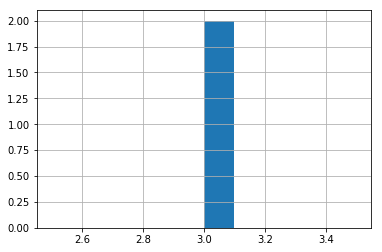

In [24]:
df['animal'].value_counts().hist()

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** You can set a custom size for your plot by sending it something like `figsize=(2,15)`

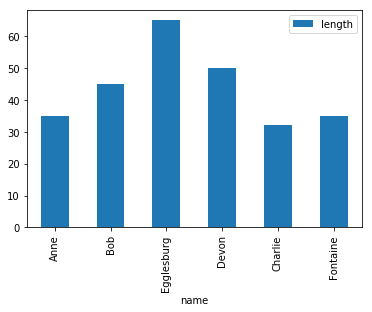

In [16]:
df.plot(kind='bar',x='name', y='length')

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

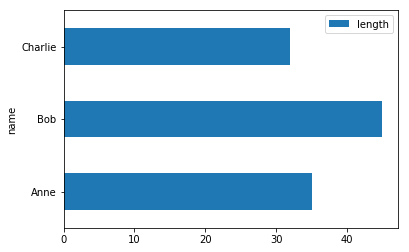

In [16]:
cats.plot(kind='barh', x='name', y='length')
#plot the cats

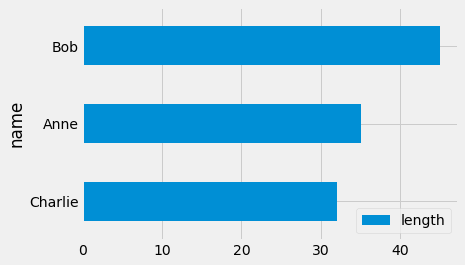

In [39]:
#sort the cats! and then plot them 
cats.sort_values(by='length', ascending=True).plot(kind='barh', x='name', y='length')

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

In [40]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#I think I"m making this too complicated, but I'm confused by this.